# loans regression

## read and preprocessing data set

In [154]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# read dataset with pandas

df = pd.read_csv('loans.csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [62]:
# shape of data set and name columns

print(df.shape)
print(df.columns)

(443, 8)
Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')


In [63]:
# To continue the normalization and graphing process, and finally build the regression model,
# we don't need columns 'client_id' , 'loan_id' , 'loan_start' ,'loan_end'. we can remove them from the data set.

features_df = df.drop(['client_id' , 'loan_id' , 'loan_start' , 'loan_end'], axis=1)
features_df.head()

,loan_type,loan_amount,repaid,rate
0,home,13672,0,2.15
1,credit,9794,0,1.25
2,home,12734,1,0.68
3,cash,12518,1,1.24
4,credit,14049,1,3.13


In [64]:
# get general information about data set

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   rate         443 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.0+ KB


In [65]:
# checking for the missing values

features_df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
rate           0
dtype: int64

In [66]:
# checking the data types of the columns

features_df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
rate           float64
dtype: object

In [67]:
# the number of different values for the loan_type column

features_df['loan_type'].value_counts()

loan_type
home      121
cash      108
credit    107
other     107
Name: count, dtype: int64

In [68]:
# change loan_type to integer with labelencoder

change_loan_type = LabelEncoder()
features_df['loan_type'] = change_loan_type.fit_transform(features_df['loan_type'])
features_df['loan_type'] = features_df['loan_type'].astype(int)
print(features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    int64  
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   rate         443 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.0 KB
None


In [69]:
features_df['loan_type'].value_counts()

loan_type
2    121
0    108
1    107
3    107
Name: count, dtype: int64

In [70]:
# Statistical description of the data set

features_df.describe()

,loan_type,loan_amount,repaid,rate
count,443.000000,443.000000,443.000000,443.000000
mean,1.512415,7982.311512,0.534989,3.217156
std,1.106012,4172.891992,0.499338,2.397168
min,0.000000,559.000000,0.000000,0.010000
25%,1.000000,4232.500000,0.000000,1.220000
50%,2.000000,8320.000000,1.000000,2.780000
75%,2.000000,11739.000000,1.000000,4.750000
max,3.000000,14971.000000,1.000000,12.620000


### data visualization

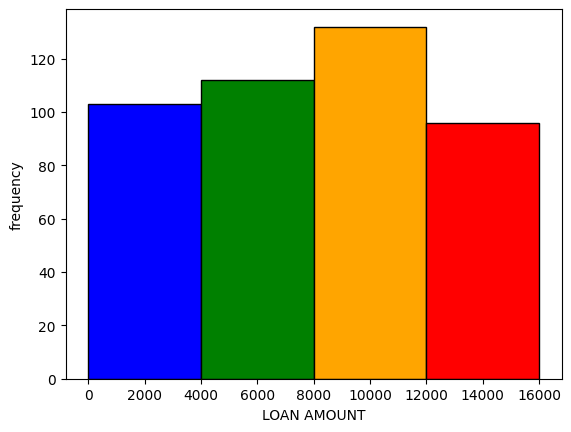

In [106]:
# divide the column related to 'loan_amount' in different bins and display their frequency amount

bins = [0,4000,8000,12000,16000]

colors = ['blue' , 'green' , 'orange' , 'red']

N,bins,patches = plt.hist(features_df.loan_amount , bins=bins , edgecolor='black')

for i in range(len(colors)):
    patches[i].set_facecolor(colors[i])
plt.xlabel("LOAN AMOUNT")
plt.ylabel("frequency")
plt.show()

<Axes: xlabel='loan_type', ylabel='loan_amount'>

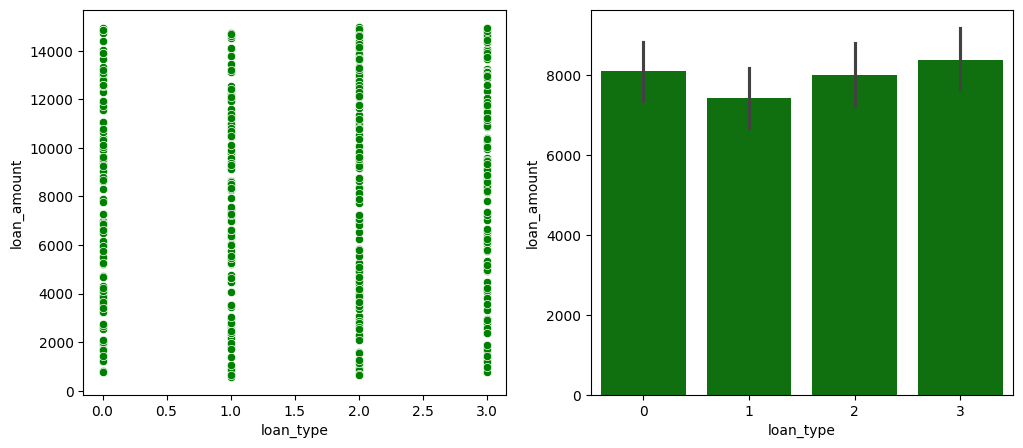

In [107]:
# In this section, show different loan types with the loan amount with two scatter plot and bar plot

fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.scatterplot(x='loan_type' , y='loan_amount' , data=features_df, color='green', ax=ax[0])
sns.barplot(x='loan_type' , y='loan_amount' , data=features_df, color='green', ax=ax[1])


<Axes: xlabel='rate', ylabel='loan_amount'>

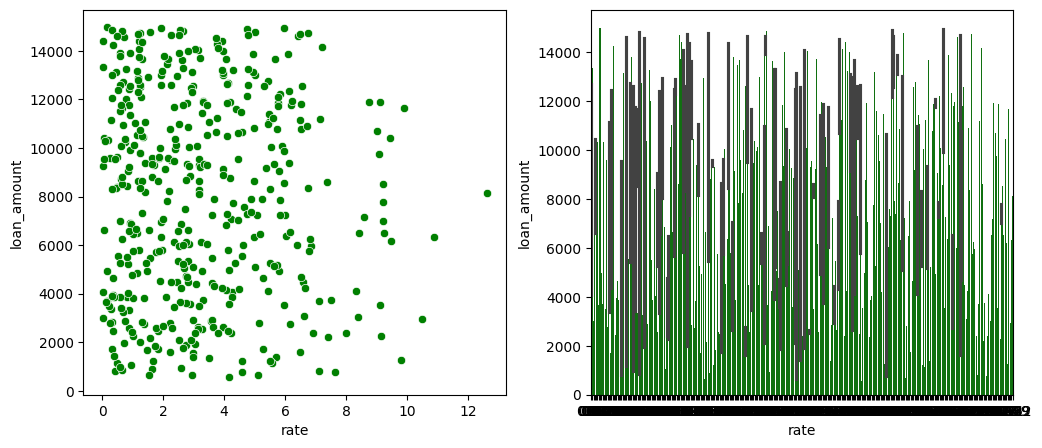

In [108]:
# In this section, we show rate with the loan amount with two scatter plot and bar plot

fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.scatterplot(x='rate' , y='loan_amount' , data=features_df, color='green', ax=ax[0])
sns.barplot(x='rate' , y='loan_amount' , data=features_df, color='green', ax=ax[1])

#### Now let's plot the correlation as a graph for the features we want

In [113]:
features_df.corr()

,loan_type,loan_amount,repaid,rate
loan_type,1.000000,0.038058,0.002284,0.007582
loan_amount,0.038058,1.000000,0.012506,-0.033340
repaid,0.002284,0.012506,1.000000,-0.016172
rate,0.007582,-0.033340,-0.016172,1.000000


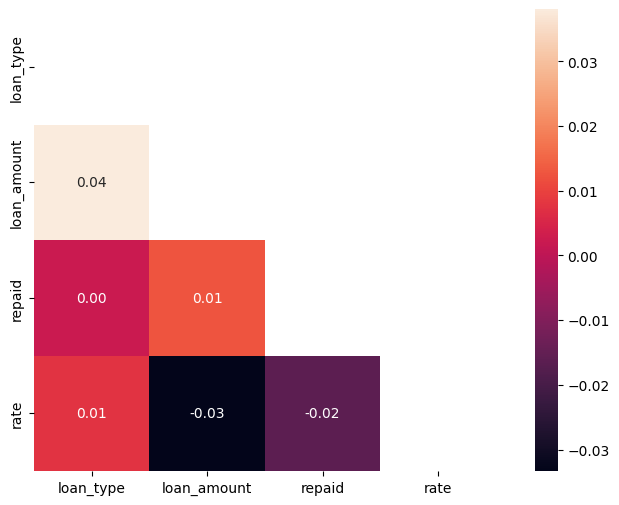

In [115]:
plt.figure(figsize=(10 , 6))
corr = features_df.corr()
mask = np.triu(corr)
sns.heatmap(corr , square=True , mask = mask , annot=True , fmt = '.2f')
plt.show()

In [116]:
# Based on the scatter plots and correlations between the variables, we find that none of the variables have a linear relationship
# with the loan amount that we can use linear regression. 

# But based on what was requested of us, we build linear regression models. 
# But we must know that these models dont give us a correct prediction of the loan amount.

## Single linear regression Models

#### single linear regression with ****loan_type**** and ****loan_amount****

In [117]:
# Separating data and split them for training and testing

X = features_df[['loan_type']]
y = features_df[['loan_amount']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(443, 1)
(354, 1)
(89, 1)
------------------------
(443, 1)
(354, 1)
(89, 1)


In [118]:
# data normalization

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[ 0.44134788],
       [-0.46382393],
       [ 0.44134788],
       [-1.36899574],
       [-0.46382393]])

In [119]:
# create regression model for "loan_type" and "loan_amount" 

model = LinearRegression()
model

LinearRegression()

In [120]:
# fit data with model

model.fit(X_train , y_train)

LinearRegression()

In [121]:
# using the model to predict the test data

y_pred = model.predict(X_test)

In [134]:
# Calculating the Mean Square Error and R-Squared

# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 15524855.328105053
R-Squared: -0.014268034965147613


In [123]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1

model intercept: [7783.4043053]
model coef: [[192.98844514]]


Text(0, 0.5, 'loan amount')

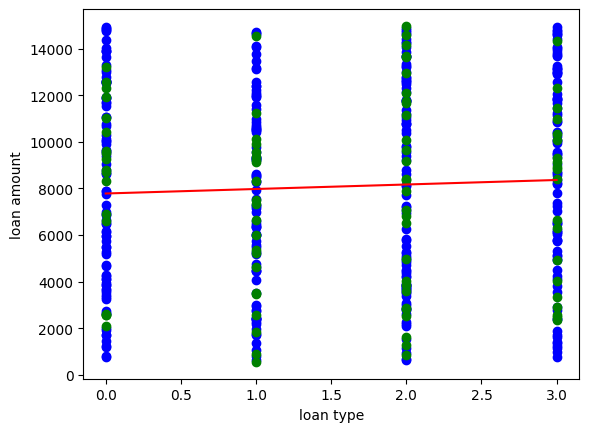

In [124]:
# Display the train and test data along with the regression line

plt.scatter(X_train.loan_type, y_train.loan_amount,  color='blue')
plt.scatter(X_test.loan_type, y_test.loan_amount,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("loan type")
plt.ylabel("loan amount")

#### single linear regression with ****repaid**** and ****loan_amount****

In [125]:
# Separating data and split them for training and testing

X = features_df[['repaid']]
y = features_df[['loan_amount']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(443, 1)
(354, 1)
(89, 1)
------------------------
(443, 1)
(354, 1)
(89, 1)


In [126]:
# data normalization

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[-1.07260684],
       [-1.07260684],
       [ 0.93230806],
       [ 0.93230806],
       [ 0.93230806]])

In [127]:
# create regression model for "repaid" and "loan_amount" 

model = LinearRegression()
model

LinearRegression()

In [130]:
# fit data with model

model.fit(X_train , y_train)

LinearRegression()

In [131]:
# using the model to predict the test data

y_pred = model.predict(X_test)

In [135]:
# Calculating the Mean Square Error and R-Squared

# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 15524855.328105053
R-Squared: -0.014268034965147613


In [136]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1

model intercept: [8098.01136364]
model coef: [[-51.05068948]]


Text(0, 0.5, 'loan amount')

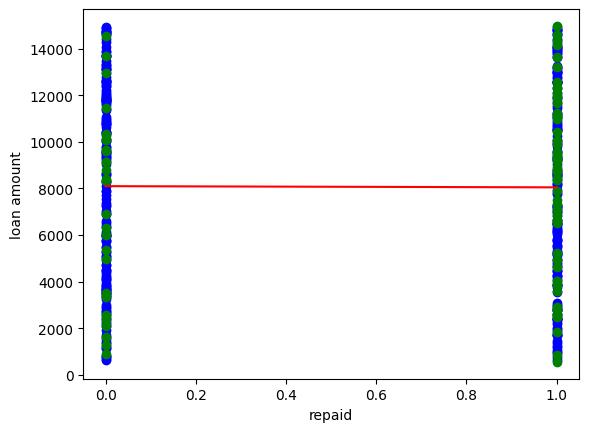

In [137]:
# Display the train and test data along with the regression line

plt.scatter(X_train.repaid, y_train.loan_amount,  color='blue')
plt.scatter(X_test.repaid, y_test.loan_amount,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("repaid")
plt.ylabel("loan amount")

#### single linear regression with ****rate**** and ****loan_amount****

In [138]:
# Separating data and split them for training and testing

X = features_df[['rate']]
y = features_df[['loan_amount']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(443, 1)
(354, 1)
(89, 1)
------------------------
(443, 1)
(354, 1)
(89, 1)


In [139]:
# data normalization

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[-0.44567691],
       [-0.82154446],
       [-1.0595939 ],
       [-0.82572076],
       [-0.03639891]])

In [140]:
# create regression model for "repaid" and "loan_amount" 

model = LinearRegression()
model

LinearRegression()

In [141]:
# fit data with model

model.fit(X_train , y_train)

LinearRegression()

In [142]:
# using the model to predict the test data

y_pred = model.predict(X_test)

In [143]:
# Calculating the Mean Square Error and R-Squared

# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 15486298.545382299
R-Squared: -0.011749047739805007


In [144]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1

model intercept: [8252.66818854]
model coef: [[-54.29900457]]


Text(0, 0.5, 'loan amount')

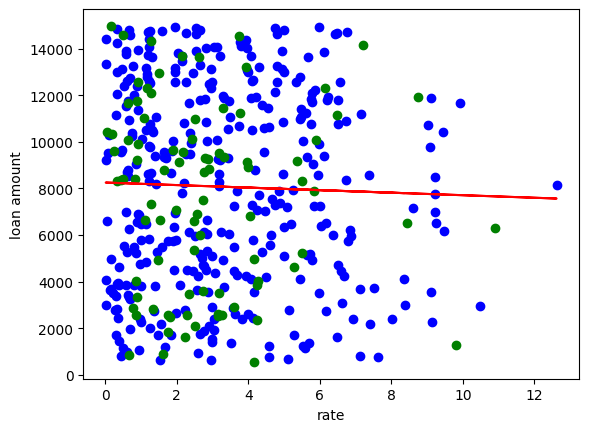

In [145]:
# Display the train and test data along with the regression line

plt.scatter(X_train.rate, y_train.loan_amount,  color='blue')
plt.scatter(X_test.rate, y_test.loan_amount,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("rate")
plt.ylabel("loan amount")

# Multiple linear regression Models

## Separating data and split them for training and testing

In [147]:
X = features_df[['loan_type', 'repaid', 'rate']]
y = features_df[['loan_amount']]

# split %80 for tarin and %20 for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(443, 3)
(354, 3)
(89, 3)
------------------------
(443, 1)
(354, 1)
(89, 1)


In [148]:
# data normalization

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[ 0.44134788, -1.07260684, -0.44567691],
       [-0.46382393, -1.07260684, -0.82154446],
       [ 0.44134788,  0.93230806, -1.0595939 ],
       [-1.36899574,  0.93230806, -0.82572076],
       [-0.46382393,  0.93230806, -0.03639891]])

In [149]:
# create regression model for "repaid" and "loan_amount" 

model = LinearRegression()
model

LinearRegression()

In [150]:
# fit data with model

model.fit(X_train , y_train)

LinearRegression()

In [151]:
# using the model to predict the test data

y_pred = model.predict(X_test)

In [153]:
# Calculating the Mean Square Error and R-Squared

# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 15573987.137400234
R-Squared: -0.01747790859133791


In [152]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1,2,3

model intercept: [7984.94232309]
model coef: [[192.33299379 -42.89267723 -53.8963556 ]]


# Polynomial Reggression
#### create the polynomial and determine the degree of power

In [158]:
pf = PolynomialFeatures(degree=3)
pf

PolynomialFeatures(degree=3)

In [156]:
# Create new X train and test for polynomial

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [157]:
# Training the model

model.fit(X_train_poly , y_train)

LinearRegression()

In [159]:
# using the polynomial model to predict the test data

y_pred_poly = model.predict(X_test_poly)

In [160]:
# Calculating the mse and r score

# mse
mse = mean_squared_error(y_test , y_pred_poly)

# r-score
r2 = r2_score(y_test , y_pred_poly)

# show result
print(f"mean square error: {mse}")
print(f"R-squared: {r2}")

mean square error: 16759320.564644037
R-squared: -0.0949179736109853
